Forest Cover Type Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance

df = pd.read_csv("covtype.csv")

In [4]:
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



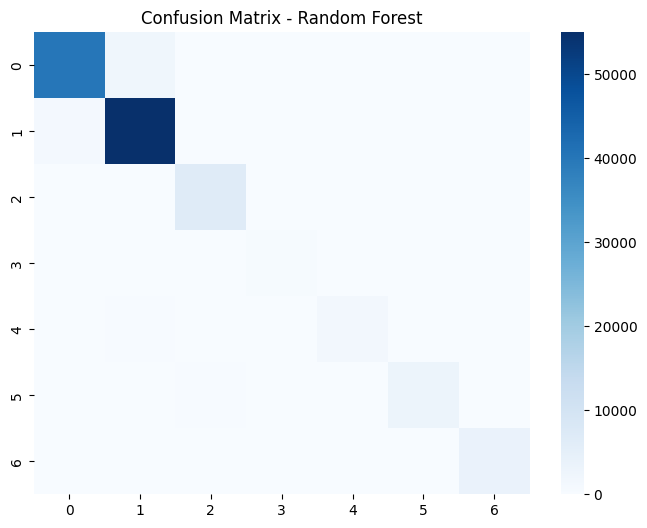

In [6]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [7]:
y_xgb = y - 1  
X_train, X_test, y_train, y_test = train_test_split(
    X, y_xgb, test_size=0.2, random_state=42
)

xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_xgb)),
    eval_metric="mlogloss",
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

y_test_original = y_test + 1
y_pred_xgb_original = y_pred_xgb + 1

print("XGBoost Results")
print(classification_report(y_test_original, y_pred_xgb_original))

XGBoost Results
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42557
           2       0.87      0.90      0.88     56500
           3       0.90      0.91      0.91      7121
           4       0.91      0.86      0.89       526
           5       0.89      0.59      0.71      1995
           6       0.85      0.82      0.83      3489
           7       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



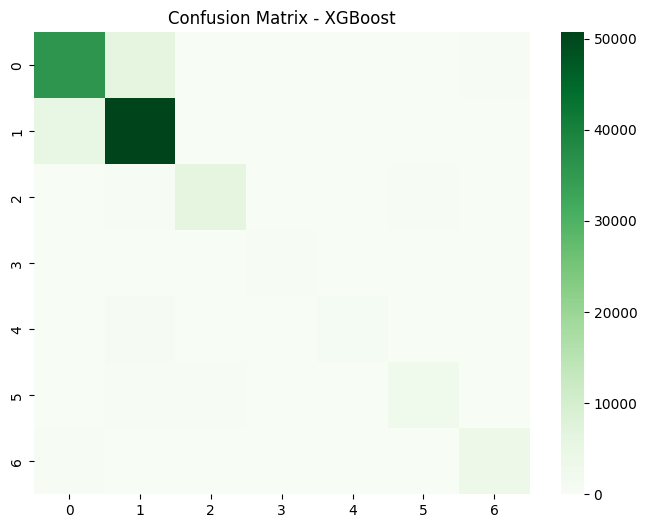

In [8]:
cm2 = confusion_matrix(y_test_original, y_pred_xgb_original)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=False, cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.show()

<Figure size 1000x600 with 0 Axes>

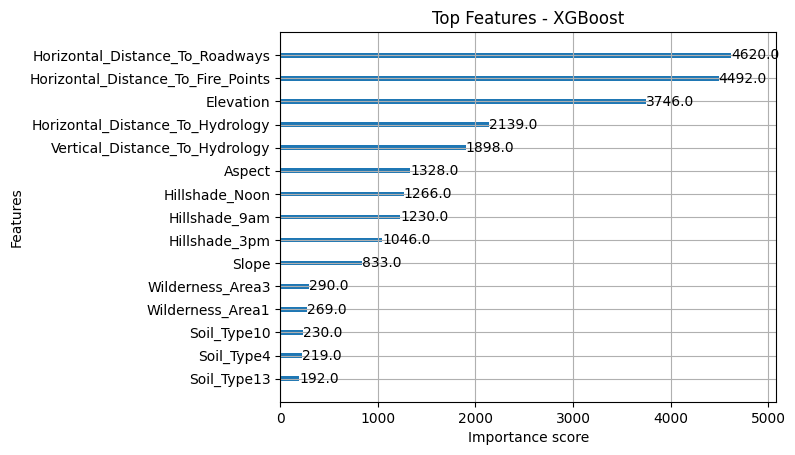

In [9]:
plt.figure(figsize=(10,6))
plot_importance(xgb_clf, max_num_features=15)
plt.title("Top Features - XGBoost")
plt.show()

Bonus

In [10]:
params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    params, cv=3, scoring="accuracy", n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best RF Params:", grid.best_params_)
print("Best RF Score:", grid.best_score_)


Best RF Params: {'max_depth': None, 'n_estimators': 200}
Best RF Score: 0.9468383801259979
